# Introduction to Neural Networks


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a CNN with the built-in **Keras** module from **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [ ]:
# UNCOMMENT IF USING COLAB
from google.colab import drive
drive.mount('/content/drive')
IMDIR = '/content/drive/MyDrive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_dataset(IMDIR):
    train_dataset = h5py.File(IMDIR+'dataset/train_catvnoncat.h5', "r")

    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])


    test_dataset = h5py.File(IMDIR+'dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)

#### Visualize data

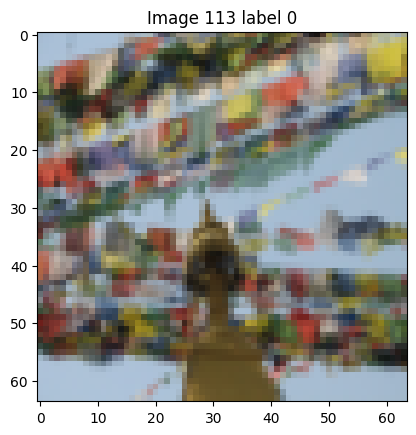

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [ ]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]),
       "images of dimensionality "
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [ ]:
train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)
print ("Original train X shape: " + str(train_x.shape))
print ("Original test X shape: " + str(test_x.shape))
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Original train X shape: (209, 64, 64, 3)
Original test X shape: (50, 64, 64, 3)
Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [ ]:
train_x = train_x/255.
test_x = test_x/255.

### 1. Classification with a single neuron


**a)** Fill-in the following three functions to define the single neuron model (a single neuron in the hidden layer):
- A function **initialize_parameters**, which given the number of desired weights ```dim```  it inizializes the neuron parameters.  
> The function will initialize:
> * the model's weights $\mathbf{w}$ by randomly, by sampling small values from a normal distribution (**Hint:** np.random.randn).
> * the bias $b$ with 0.
What is the number of weights required? pass this information as a parameter to the function.
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, the weights and bias, computes the output of the single neuron model

In [ ]:
def sigmoid(z):
  f=1/(1+np.exp(-z))
  return f

In [ ]:

def initialize_parameters(dim):
    w = np.random.randn(dim,1)*0.01
    b = 0
    return w, b

In [ ]:
def neuron(w,b,x):
    pred_y = np.dot(w.T,x)+b
    return pred_y

In [ ]:
# train_x.shape
# np.array(train_x)[0,:].shape
# np.array(train_x)[:,1].shape
#w.shape

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.

 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}


In [ ]:

w, b = initialize_parameters(train_x.shape[0])

neuron_output = neuron(w,b,train_x)

neuron_output.shape
Y_pred = sigmoid(neuron_output)
print(Y_pred)

[[0.44559314 0.3611717  0.39775825 0.5864271  0.47572214 0.43260556
  0.44797567 0.53835214 0.30165141 0.45589469 0.38757113 0.39598054
  0.47004005 0.45014009 0.42002936 0.34686422 0.42556038 0.42771572
  0.38056567 0.49751145 0.38612461 0.52072625 0.37092267 0.34060437
  0.39833118 0.42972136 0.48392784 0.33942763 0.43147563 0.53568241
  0.54503606 0.48628537 0.42242014 0.41492517 0.4606324  0.47870859
  0.45210534 0.30059382 0.51650644 0.45036001 0.45007992 0.5632371
  0.37677345 0.42322781 0.4584218  0.44515123 0.45619112 0.38374428
  0.49071568 0.45352586 0.33481315 0.4439042  0.36840036 0.40477489
  0.45215507 0.33426472 0.38501151 0.31988517 0.44102424 0.4654649
  0.35356441 0.45955598 0.3916694  0.45036061 0.33966778 0.43032869
  0.24587567 0.48269743 0.35030914 0.36093788 0.49993661 0.34449163
  0.55108472 0.45160992 0.37654432 0.41128234 0.52196318 0.50860676
  0.57009638 0.52963264 0.53781546 0.39973708 0.53038756 0.50211108
  0.49456573 0.51636139 0.43053324 0.47011506 0.42

**c) Cost estimation:**

We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}

 The following cross-entropy function should give as result the **scalar** cost value computed over the entire dataset

In [ ]:
# Y_pred.shape[1]
print(Y_pred[0].shape)

(209,)


In [ ]:
def crossentropy(train_y, Y_pred):
    m = Y_pred.shape[1]

    sum = np.sum(train_y * np.log(Y_pred + 1e-12) + (1 - train_y) * np.log(1 - Y_pred + 1e-12))


    cost = (-1/m)*sum #replace

    return cost

crossentropy(train_y, Y_pred)


0.6799843410508211

**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = \\
\frac{\partial E}{\partial b} =
\end{align}

See a demonstration of the gradient computation in
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.


In [ ]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]


    #find gradient (back propagation)
    dw = np.dot(X,np.transpose((Ypred - Y)))/m
    db = np.sum(Ypred - Y)/m
    grads = {"dw": dw,
             "db": db}

    return grads

grads = backpropagate(train_x,train_y, Y_pred)
print(grads)


{'dw': array([[0.01272168],
       [0.02807433],
       [0.01597453],
       ...,
       [0.02067481],
       [0.03269679],
       [0.00691316]]), 'db': 0.08171982001863005}


**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [ ]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(X.shape[0])  #train_x.shape[0]

    for i in range(iterations):
        neuron_output = neuron(w,b,X)

        Ypred = sigmoid(neuron_output)
        cost = crossentropy(Y, Ypred)
        grads= backpropagate(X, Y, Ypred)

        #update parameters
        w = w - learning_rate*grads['dw']
        b = b - learning_rate*grads['db']
        costs.append(cost)

        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return w,b, costs

w, b, costs = gradient_descent(train_x,train_y,iterations=2000, learning_rate = 0.016)

Cost after iteration 0: 0.747282
Cost after iteration 100: 0.478178
Cost after iteration 200: 3.594941
Cost after iteration 300: 3.007889
Cost after iteration 400: 1.039264
Cost after iteration 500: 0.911667
Cost after iteration 600: 0.124308
Cost after iteration 700: 0.094235
Cost after iteration 800: 0.082572
Cost after iteration 900: 0.072400
Cost after iteration 1000: 0.066434
Cost after iteration 1100: 0.061710
Cost after iteration 1200: 0.057784
Cost after iteration 1300: 0.054422
Cost after iteration 1400: 0.051485
Cost after iteration 1500: 0.048883
Cost after iteration 1600: 0.046552
Cost after iteration 1700: 0.044447
Cost after iteration 1800: 0.042532
Cost after iteration 1900: 0.040780


**f) Plot the training loss curve**
Plot the evolution of the loss against the iterations

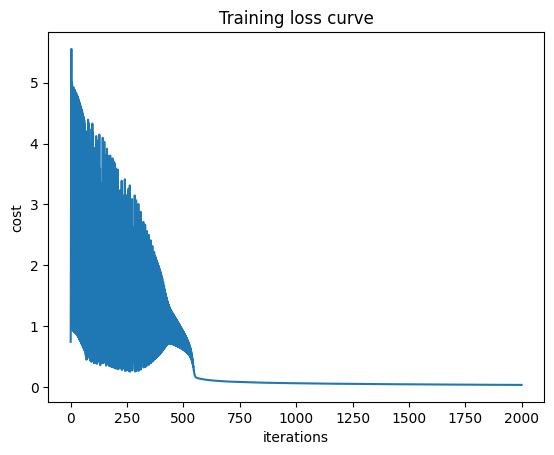

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Training loss curve')
plt.show()

**g) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [ ]:
def predict(w, b, X):
    neuron_output = neuron(w,b,X)
    y_pred = sigmoid(neuron_output)
    return y_pred

# predict
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))


Train Acc: 96.28778236597577 %
Test Acc: 65.53830446647774 %


**h)Choose learning rate on a validation set** Use 10% of the training data as validation to choose the learning rate. What are the best results you can obtain? (use only the validation data to choose, buy repport the accuracy on the train and test data)


Cost after iteration 0: 0.743084
Cost after iteration 100: 0.584324
Cost after iteration 200: 0.537802
Cost after iteration 300: 0.504300
Cost after iteration 400: 0.477518
Cost after iteration 500: 0.454964
Cost after iteration 600: 0.435362
Cost after iteration 700: 0.417969
Cost after iteration 800: 0.402315
Cost after iteration 900: 0.388078
Cost after iteration 1000: 0.375025
Cost after iteration 1100: 0.362981
Cost after iteration 1200: 0.351810
Cost after iteration 1300: 0.341402
Cost after iteration 1400: 0.331669
Cost after iteration 1500: 0.322536
Cost after iteration 1600: 0.313943
Cost after iteration 1700: 0.305835
Cost after iteration 1800: 0.298167
Cost after iteration 1900: 0.290901
Train Acc: 77.2306230435717 %
Val Acc: 51.88081657726862 %
Cost after iteration 0: 0.683986
Cost after iteration 100: 0.794496
Cost after iteration 200: 0.520202
Cost after iteration 300: 0.345915
Cost after iteration 400: 0.249235
Cost after iteration 500: 0.220606
Cost after iteration 600:

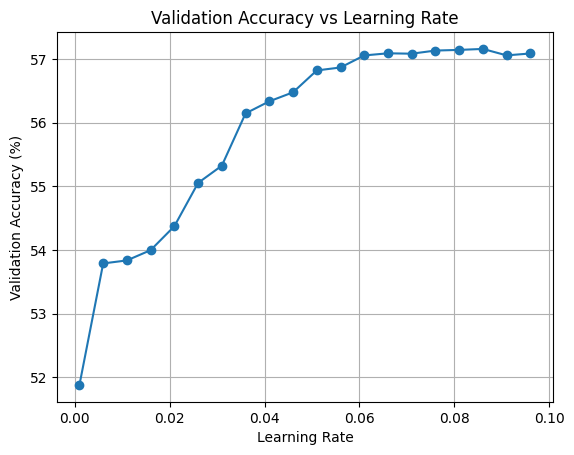

In [ ]:
val_x = train_x[ :, :21]
val_y = train_y[:, :21]

train_x = train_x[:, 22:]
train_y = train_y[:, 22:]

lr_values = []
val_acc_values = []
lr = 0.001

while lr<0.1:
  w, b, cost= gradient_descent(train_x, train_y, iterations = 2000, learning_rate=lr)
  val_pred_y = predict(w, b, train_x)
  test_pred_y = predict(w, b, val_x)
  print("Train Acc: {} %".format(100 - np.mean(np.abs(val_pred_y - train_y)) * 100))
  print("Val Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - val_y)) * 100))
  val_acc = 100 - np.mean(np.abs(test_pred_y - val_y)) * 100

  lr_values.append(lr)
  val_acc_values.append(val_acc)

  lr+=0.005
plt.plot(lr_values, val_acc_values, marker='o')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Learning Rate')
plt.title('Validation Accuracy vs Learning Rate')
plt.grid(True)
plt.show()